## Naugty Passwords

What are the naughty words which are used most frequently in passwords?

We need two things

- A list of naughty words.
- An API to provide how frequently they are used.

The first is provided by [https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words](https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words) and The Second by Have I been pwned API.

Lets get started. Scroll to the bottom to see the results.

In [1]:
# Some imports

import requests
import pandas
from pwnedapi import Password


In [2]:
# Get the list of naugthy words
naughty_words = requests.get("https://raw.githubusercontent.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words/master/en").text.splitlines()

In [3]:
# Use pwnedapi to get the number of time the word has been used as a pasword.

password = Password(naughty_words[1])
naughty_word_with_password = [(word, Password(word)) for  word in naughty_words]
def check_is_pwned(word, pasword):
    is_pwned = pasword.is_pwned()
    # print(word)
    # print(pasword.pwned_count)
    return is_pwned
naughty_word_with_password= [el for el in naughty_word_with_password if check_is_pwned(*el)]
naughty_word_with_pwned_count = {word: password.pwned_count for word, password in naughty_word_with_password}

In [4]:
# Find the top 40 words
naughty_password = sorted(naughty_word_with_pwned_count.items(), key=lambda x: x[1], reverse=True)[:40]


In [5]:
# What are the naughty passwords?
naughty_password

[('asshole', 171492),
 ('playboy', 113212),
 ('sexy', 104937),
 ('pussy', 98400),
 ('fuck', 95003),
 ('bitch', 86676),
 ('hardcore', 80829),
 ('lolita', 77944),
 ('bullshit', 69194),
 ('nigger', 62543),
 ('sex', 60045),
 ('nigga', 43158),
 ('penis', 43089),
 ('bitches', 41022),
 ('xxx', 35696),
 ('fucking', 34299),
 ('bollocks', 34028),
 ('shit', 33606),
 ('vagina', 31940),
 ('dick', 31770),
 ('bastard', 27544),
 ('motherfucker', 25342),
 ('boobs', 24626),
 ('blowjob', 22438),
 ('ass', 21206),
 ('hentai', 17317),
 ('escort', 16406),
 ('faggot', 15262),
 ('beaner', 14724),
 ('porn', 13993),
 ('panties', 13707),
 ('porno', 13686),
 ('cock', 13593),
 ('butthole', 13392),
 ('butt', 13155),
 ('titties', 12850),
 ('hooker', 12317),
 ('tits', 11645),
 ('slut', 11506),
 ('cunt', 11377)]

In [6]:
# Get the data in a dataframe
df = pandas.DataFrame(naughty_password, columns=["word", "pwned_count"])
df = df.set_index("word")

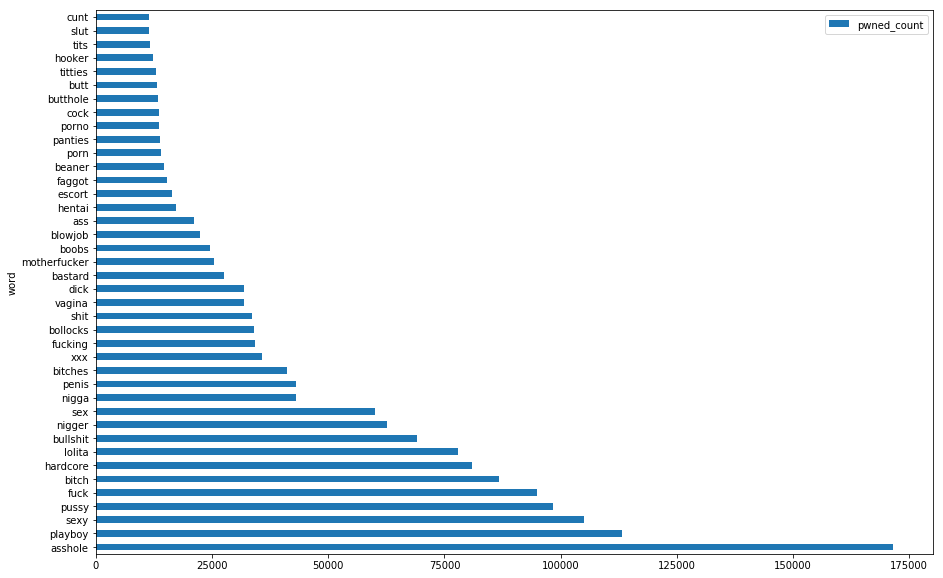

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

plt = df.plot.barh()
plt